In [3]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn

In [24]:
estado = "RJ"

# Consultando dados armazenados no github
uri = f"https://github.com/yuri-martins/analise_municip_eleicoes20/blob/main/Fonte%20de%20dados/Consulta%20Candidato/consulta_cand_2020_{estado}.csv?raw=true"

# Montando o arquivo
arquivo = f'consulta_cand_2020_{estado}.csv'

# GET
!wget -O $arquivo $uri

--2020-11-04 05:21:10--  https://github.com/yuri-martins/analise_municip_eleicoes20/blob/main/Fonte%20de%20dados/Consulta%20Candidato/consulta_cand_2020_RJ.csv?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yuri-martins/analise_municip_eleicoes20/raw/main/Fonte%20de%20dados/Consulta%20Candidato/consulta_cand_2020_RJ.csv [following]
--2020-11-04 05:21:10--  https://github.com/yuri-martins/analise_municip_eleicoes20/raw/main/Fonte%20de%20dados/Consulta%20Candidato/consulta_cand_2020_RJ.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yuri-martins/analise_municip_eleicoes20/main/Fonte%20de%20dados/Consulta%20Candidato/consulta_cand_2020_RJ.csv [following]
--2020-11-04 05:21:10--  https://raw.githubusercontent.com/yuri-martins/analise_mu

In [26]:
# Lendo o csv e tranformando em DataFrame
df = pd.read_csv(fonte, sep=';', encoding='latin-1')

# visualizar DataFrame
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
0,02/11/2020,17:17:07,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RJ,60011,RIO DE JANEIRO,13,VEREADOR,190000987415,35654,ISMAEL DA SILVA LEMOS,VIGILANTE LEMOS,#NULO#,70326118268,ISMAELEMOSRJ@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,35,PMB,PARTIDO DA MULHER BRASILEIRA,190000115595,PARTIDO ISOLADO,PMB,1,BRASILEIRA NATA,RJ,-3,RIO DE JANEIRO,05/09/1981,39,107875000345,2,MASCULINO,5,ENSINO MÉDIO INCOMPLETO,3,CASADO(A),3,PARDA,254,VIGILANTE,1594577,-1,#NULO#,N,S,-1,6010224020206190023,-1,#NULO#,-1,#NULO#,SIM
1,02/11/2020,17:17:07,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RJ,58017,ANGRA DOS REIS,13,VEREADOR,190000900646,55133,ADEMIR ALVES DOS SANTOS,ADEMIR DO PEIXE,#NULO#,61408328704,ADVOGADO.FERREIRA1@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,55,PSD,PARTIDO SOCIAL DEMOCRÁTICO,190000102327,PARTIDO ISOLADO,PSD,1,BRASILEIRA NATA,RJ,-3,ANGRA DOS REIS,15/01/1960,60,70196670329,2,MASCULINO,3,ENSINO FUNDAMENTAL INCOMPLETO,3,CASADO(A),1,BRANCA,604,PESCADOR,165993,-1,#NULO#,N,S,-1,6002258020206190147,-1,#NULO#,-1,#NULO#,SIM
2,02/11/2020,17:17:07,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RJ,58750,PARATY,13,VEREADOR,190001233767,45645,HILTON MELO DA SILVA FILHO,HILTINHO MELO,#NULO#,47043245753,HILTON.MELO.IMOVEIS@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,45,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,190000152511,PARTIDO ISOLADO,PSDB,1,BRASILEIRA NATA,RJ,-3,PARATY,06/09/1958,62,41156290337,2,MASCULINO,8,SUPERIOR COMPLETO,9,DIVORCIADO(A),3,PARDA,403,"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES",22421,-1,#NULO#,N,S,-1,6002178220206190057,-1,#NULO#,-1,#NULO#,SIM
3,02/11/2020,17:17:07,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RJ,58041,BELFORD ROXO,13,VEREADOR,190001070648,90655,NILSON FERNANDES CONCEIÇÃO,NILSON FEIJÃO,#NULO#,7636950766,FERNANDESNILSON76@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,90,PROS,PARTIDO REPUBLICANO DA ORDEM SOCIAL,190000129457,PARTIDO ISOLADO,PROS,1,BRASILEIRA NATA,RJ,-3,BELFORD ROXO,08/04/1976,44,91736660388,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,1,SOLTEIRO(A),2,PRETA,999,OUTROS,140101,-1,#NULO#,N,S,-1,6004975320206190154,-1,#NULO#,-1,#NULO#,SIM
4,02/11/2020,17:17:07,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,RJ,58041,BELFORD ROXO,13,VEREADOR,190001071592,35679,ROBERTO RAMOS SOUZA,ROBERTO RAMOS DA IGREJINHA,#NULO#,87171791734,AAUGUSTO-SILVA@HOTMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,35,PMB,PARTIDO DA MULHER BRASILEIRA,190000129572,PARTIDO ISOLADO,PMB,1,BRASILEIRA NATA,RJ,-3,RIO DE JANEIRO,05/09/1960,60,43137020345,2,MASCULINO,3,ENSINO FUNDAMENTAL INCOMPLETO,1,SOLTEIRO(A),3,PARDA,703,ELETRICISTA E ASSEMELHADOS,140101,-1,#NULO#,N,S,-1,6005599320206190154,-1,#NULO#,-1,#NULO#,SIM


In [28]:
# Montando DataFrame com candidatos de Belford Roxo

df_belfordroxo = df.loc[(df['NM_UE'] == 'BELFORD ROXO')]

In [29]:
df_belfordroxo.shape

(590, 63)

#Analise exploratória dos candidatos ao cargo de vereador de Belford Roxo

In [30]:
df_belfordroxo.groupby(['DS_CARGO']).size()

DS_CARGO
PREFEITO           6
VEREADOR         578
VICE-PREFEITO      6
dtype: int64

In [31]:
# Selecionando apenas candidatos ao cargo de vereador
vereador_bel = df_belfordroxo.loc[(df['DS_CARGO'] == 'VEREADOR')]

In [32]:
# Explorar dados categoricos: Situação de Candidatura
vereador_bel.groupby(['DS_DETALHE_SITUACAO_CAND']).size()

DS_DETALHE_SITUACAO_CAND
DEFERIDO                  538
INDEFERIDO COM RECURSO     29
PEDIDO NÃO CONHECIDO        1
RENÚNCIA                   10
dtype: int64

In [33]:
vereador_bel.groupby(['TP_AGREMIACAO']).size()

TP_AGREMIACAO
PARTIDO ISOLADO    578
dtype: int64

In [34]:
vereador_bel.groupby(['DS_GENERO']).size()

DS_GENERO
FEMININO     191
MASCULINO    387
dtype: int64

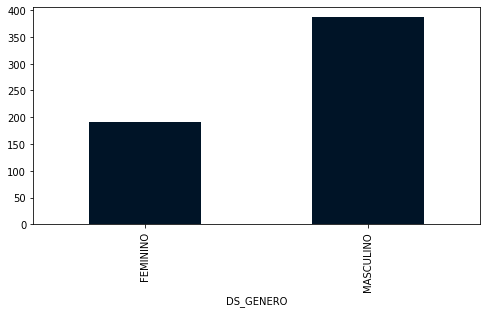

In [50]:
vereador_bel.groupby(['DS_GENERO']).size().plot.bar(color = '#001427', figsize=(8,4))

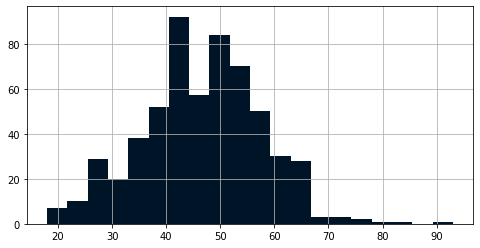

In [38]:
vereador_bel["NR_IDADE_DATA_POSSE"].hist(color = '#001427', bins = 20, figsize=(8,4))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'NR_IDADE_DATA_POSSE')

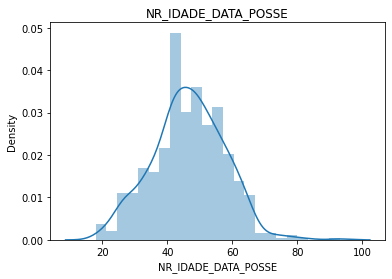

In [39]:
srn.distplot(vereador_bel['NR_IDADE_DATA_POSSE']).set_title('NR_IDADE_DATA_POSSE')

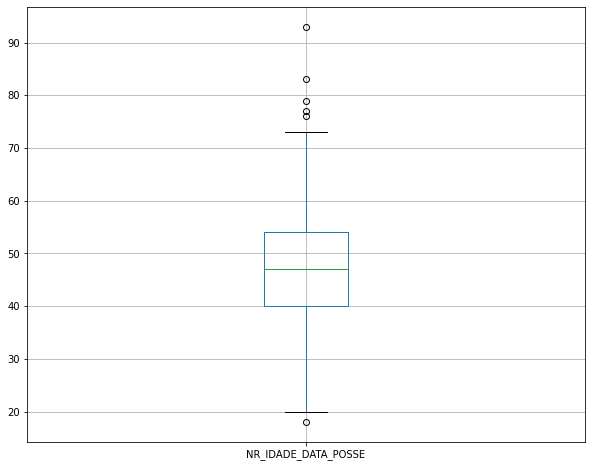

In [42]:
vereador_bel["NR_IDADE_DATA_POSSE"].plot.box(grid = True, figsize=(10,8))

In [43]:
# Média de idade dos candidatos a vereador
vereador_bel["NR_IDADE_DATA_POSSE"].mean()

46.48615916955017

In [44]:
# Explorando dados numéricos de idade
vereador_bel["NR_IDADE_DATA_POSSE"].describe()

count    578.000000
mean      46.486159
std       11.070625
min       18.000000
25%       40.000000
50%       47.000000
75%       54.000000
max       93.000000
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [45]:
# Distribuição por grau de instrução
vereador_bel.groupby(['DS_GRAU_INSTRUCAO']).size()

DS_GRAU_INSTRUCAO
ENSINO FUNDAMENTAL COMPLETO       90
ENSINO FUNDAMENTAL INCOMPLETO     68
ENSINO MÉDIO COMPLETO            277
ENSINO MÉDIO INCOMPLETO           21
LÊ E ESCREVE                       6
SUPERIOR COMPLETO                 90
SUPERIOR INCOMPLETO               26
dtype: int64

In [46]:
# Distribuição por estado civil
vereador_bel.groupby(['DS_ESTADO_CIVIL']).size()

DS_ESTADO_CIVIL
CASADO(A)                    304
DIVORCIADO(A)                 52
SEPARADO(A) JUDICIALMENTE      2
SOLTEIRO(A)                  209
VIÚVO(A)                      11
dtype: int64

In [47]:
# Distribuição por raça
vereador_bel.groupby(['DS_COR_RACA']).size()

DS_COR_RACA
BRANCA    158
PARDA     311
PRETA     109
dtype: int64

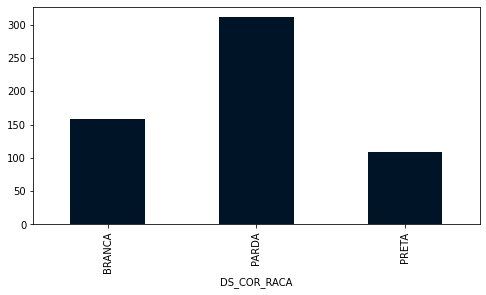

In [49]:
# Grafico de barra por distribuição por raça
vereador_bel.groupby(['DS_COR_RACA']).size().plot.bar(color = '#001427',figsize=(8,4))

In [51]:
# Distribuição por ocupação
vereador_bel.groupby(['DS_OCUPACAO']).size()

DS_OCUPACAO
ADMINISTRADOR                                                          6
ADVOGADO                                                               9
AGENTE ADMINISTRATIVO                                                  1
ALFAIATE E COSTUREIRO                                                  1
APOSENTADO (EXCETO SERVIDOR PÚBLICO)                                  16
                                                                      ..
TÉCNICO EM INFORMÁTICA                                                 1
VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA                           11
VENDEDOR PRACISTA, REPRESENTANTE, CAIXEIRO-VIAJANTE E ASSEMELHADOS     6
VEREADOR                                                              22
VIGILANTE                                                              5
Length: 67, dtype: int64

In [52]:
# Distribuição por partido
vereador_bel.groupby(['SG_PARTIDO']).size()

SG_PARTIDO
CIDADANIA         2
DEM              27
MDB              38
PATRIOTA         18
PC do B          31
PDT              38
PL               31
PMB              38
PP               32
PROS             16
PRTB             38
PSB               4
PSC              16
PSD              36
PSDB             37
PSL              31
PSOL             16
PT               38
PTB              13
PTC              10
REPUBLICANOS     30
SOLIDARIEDADE    38
dtype: int64

In [53]:
# Nacionalidade dos candidatos
vereador_bel.groupby(['DS_NACIONALIDADE']).size()

DS_NACIONALIDADE
BRASILEIRA NATA    577
ESTRANGEIRO          1
dtype: int64

In [54]:
# UF de nascimento dos candidatos
vereador_bel.groupby(['SG_UF_NASCIMENTO']).size()

SG_UF_NASCIMENTO
AL      1
BA      3
CE      5
DF      2
ES      8
MG     11
PB      5
PE      7
PR      1
RJ    523
RN      5
SE      2
SP      5
dtype: int64

In [55]:
# Municipio de nascimento dos candidatos
vereador_bel.groupby(['NM_MUNICIPIO_NASCIMENTO']).size()

NM_MUNICIPIO_NASCIMENTO
ALAGOINHA                   1
ALEGRE                      1
BARRA DE SÃO FRANCISCO      1
BELFORD ROXO              118
BELO HORIZONTE              2
                         ... 
VARRE-SAI                   1
VILA VELHA                  1
VISCONDE DO RIO BRANCO      1
VITÓRIA                     2
VOLTA REDONDA               1
Length: 65, dtype: int64